# Learnings

In [2]:
from dolfin import *

## Difference between a function and an expression

__Function__

... is described by expansion coefficients with reference to a
FunctionSpace with a given basis: $u = \sum_i U_i \phi_i$

```python
u = Function ( V ) # Defines the function space
u.vector () # The coefficients
```

__Expression__

... given by an evaluation formula (more or less explicit)

```
f = Expression ("...", degree = ...)
...
```

During assemble an Expression is interpolated into a polynomial
space of the given degree on each cell.


## Mesh info

#Mesh information can be gathered from the mesh object, e.g.,


mesh.coordinates() returns the coordinates of the vertices as a numpy array with shape (number of vertices, number of space dimensions), MM being the number of vertices in the mesh and dd being the number of space dimensions,

mesh.num_cells() returns the number of cells (triangles) in the mesh,

mesh.num_vertices() returns the number of vertices in the mesh (with our choice of linear Lagrange elements this equals the number of nodes),

mesh.cells() returns the vertex numbers of the vertices in each cell as a numpy array with shape (number of cells, number of vertices in a cell),

mesh.hmin() returns the minimum cell diameter (“smallest cell”),

mesh.hmax() returns the maximum cell diameter (“largest cell”).




## Integrate a function

In [62]:

mesh = UnitSquareMesh(42, 42)

#Volume / area
c = Constant(42.0)
print assemble(c*dx(mesh))

#Boundary (all boundaries) - surface intagrals should be in the Tosi et al script
c = Constant(42.0)
print assemble(c*ds(mesh))


f = Expression("1.0 + x[0]*x[1]", degree=2)
print assemble(f*dx(mesh))

V = FunctionSpace(mesh, "Lagrange", 2)
u = project(f, V)
print assemble(u*dx)


42.0
168.0
1.25
1.25


In [63]:
# Boundary integrals Correct way: https://fenicsproject.org/qa/4482/integrals-over-sub-domain
markers = FacetFunctionSizet(mesh, 0) # Note initialization to 0

#ds = ds[markers]
ds =  ds(subdomain_data=markers)
TopBoundary().mark(markers, 1) # marking to 1 while all other facets are 0
form = 1*ds(1, domain=mesh)
ans = assemble(form)   # circumnference
#assert abs(ans - Width) < 1E-13
print ans

1.0


In [56]:
ds(subdomain_data=markers)

Measure('exterior_facet', subdomain_id='everywhere', subdomain_data=<dolfin.cpp.mesh.FacetFunctionSizet; proxy of <Swig Object of type 'std::shared_ptr< dolfin::FacetFunction< std::size_t > > *' at 0x7f470fe0e2d0> >)

## Quadrature points

In [12]:
#https://fenicsproject.org/qa/9633/quadrature-points

#this is crashing for some reason

from dolfin import *

mesh = UnitSquareMesh(10, 10)
gdim = mesh.geometry().dim()
V = VectorFunctionSpace(mesh, 'Quadrature', 2)
# Quad points
xq = V.dofmap().tabulate_all_coordinates(mesh).reshape((-1, gdim))
# You might want to remove the duplicates
xq0 = xq[V.sub(0).dofmap().dofs()]  

        Calling FFC just-in-time (JIT) compiler, this may take some time.
Missing quad_scheme in quadrature element.


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to perform just-in-time compilation of form.
*** Reason:  ffc.jit failed with message:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/dolfin/compilemodules/jit.py", line 128, in jit
    result = ffc.jit(ufl_object, parameters=p)
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 198, in jit
    module = jit_build(ufl_object, module_name, parameters)
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 120, in jit_build
    generate=jit_generate)
  File "/usr/local/lib/python2.7/dist-packages/dijitso/jit.py", line 160, in jit
    header, source, dependencies = generate(jitable, name, signature, params["generator"])
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 66, in jit_generate
    prefix=module_name, parameters=parameters, jit=True)
  File "/usr/local/lib/python2.7/dist-packages/ffc/compiler.py", line 148, in compile_element
    prefix, parameters, jit)
  File "/usr/local/lib/python2.7/dist-packages/ffc/compiler.py", line 183, in compile_ufl_objects
    analysis = analyze_ufl_objects(ufl_objects, kind, parameters)
  File "/usr/local/lib/python2.7/dist-packages/ffc/analysis.py", line 122, in analyze_ufl_objects
    error("Missing quad_scheme in quadrature element.")
  File "<string>", line 1, in <lambda>
  File "/usr/local/lib/python2.7/dist-packages/ufl/log.py", line 171, in error
    raise self._exception_type(self._format_raw(*message))
Exception: Missing quad_scheme in quadrature element.
.
*** Where:   This error was encountered inside jit.py.
*** Process: 0
*** 
*** DOLFIN version: 2016.2.0
*** Git changeset:  0f003bc07ee5fd583fb956245016d5972b80fea1
*** -------------------------------------------------------------------------


In [3]:
Quad = VectorFunctionSpace(mesh, "Quadrature", 2)

    Calling FFC just-in-time (JIT) compiler, this may take some time.
Missing quad_scheme in quadrature element.


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to perform just-in-time compilation of form.
*** Reason:  ffc.jit failed with message:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/dolfin/compilemodules/jit.py", line 128, in jit
    result = ffc.jit(ufl_object, parameters=p)
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 198, in jit
    module = jit_build(ufl_object, module_name, parameters)
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 120, in jit_build
    generate=jit_generate)
  File "/usr/local/lib/python2.7/dist-packages/dijitso/jit.py", line 160, in jit
    header, source, dependencies = generate(jitable, name, signature, params["generator"])
  File "/usr/local/lib/python2.7/dist-packages/ffc/jitcompiler.py", line 66, in jit_generate
    prefix=module_name, parameters=parameters, jit=True)
  File "/usr/local/lib/python2.7/dist-packages/ffc/compiler.py", line 148, in compile_element
    prefix, parameters, jit)
  File "/usr/local/lib/python2.7/dist-packages/ffc/compiler.py", line 183, in compile_ufl_objects
    analysis = analyze_ufl_objects(ufl_objects, kind, parameters)
  File "/usr/local/lib/python2.7/dist-packages/ffc/analysis.py", line 122, in analyze_ufl_objects
    error("Missing quad_scheme in quadrature element.")
  File "<string>", line 1, in <lambda>
  File "/usr/local/lib/python2.7/dist-packages/ufl/log.py", line 171, in error
    raise self._exception_type(self._format_raw(*message))
Exception: Missing quad_scheme in quadrature element.
.
*** Where:   This error was encountered inside jit.py.
*** Process: 0
*** 
*** DOLFIN version: 2016.2.0
*** Git changeset:  0f003bc07ee5fd583fb956245016d5972b80fea1
*** -------------------------------------------------------------------------


## Mshr

Populating the interactive namespace from numpy and matplotlib
1009


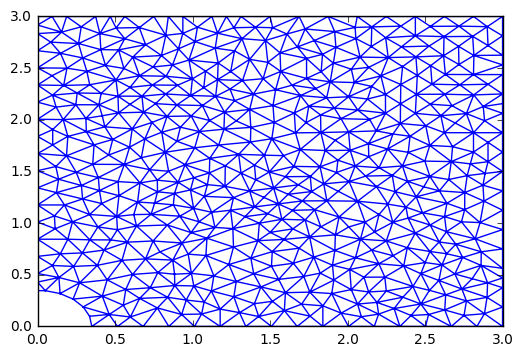

In [9]:
%pylab inline
from mshr import *
from dolfin import *


from pylab import show,triplot
domain = Rectangle(dolfin.Point(0., 0.), dolfin.Point(3., 3.)) - Circle(dolfin.Point(0.0, 0.0), .35)
mesh = generate_mesh(domain,20)
coords = mesh.coordinates()
triplot(coords[:,0], coords[:,1], triangles=mesh.cells())
print mesh.num_cells()